Logistic Regression using Sigmoid Activation Function :  [[-4.09258882  1.55273657]]
Output y be predicted : 
 [[0.0350189  0.0507849  0.07311118 0.10417545 0.14635453 0.20176493
  0.20176493 0.27148216 0.35458818 0.44750729 0.54424317 0.6377521
  0.72187975 0.79281687 0.89267466 0.92459914 0.94758509 0.96383784
  0.97518295 0.98842726]]


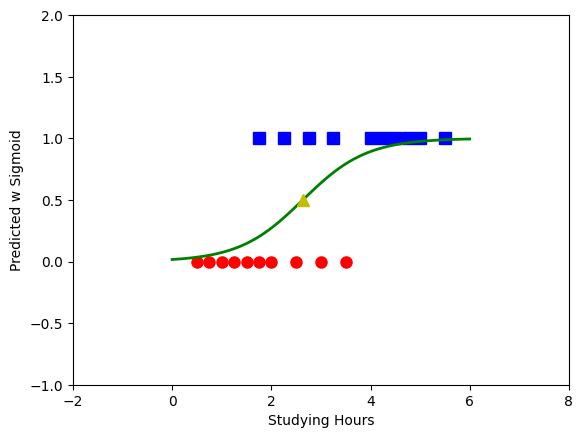

In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# Thêm vài data random khác
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

# Sigmoid
def sigmoid(s) :
    return 1/(1+np.exp(-s))

def logistic_regression (X, y, w_init, eta, tol = 1e-4, max_count=10000) :
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count :
        #mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d,1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new= w[-1] + eta*(yi - zi) * xi
            count +=1
            # Điều kiện dừng :
            if count % check_w_after == 0 :
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

d = X.shape[0]
w_init = np.random.rand(d,1)

w = logistic_regression(X, y, w_init, .05)
print('Logistic Regression using Sigmoid Activation Function : ', w[-1].T)

print('Output y be predicted : \n', sigmoid(np.dot(w[-1].T, X)))

# Matplotlib
X0 = X[1, np.where(y==0)][0]
y0 = y[np.where(y==0)]
X1 = X[1, np.where(y==1)][0]
y1 = y[np.where(y==1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threhold = -w0/w1
yy = sigmoid(w0+ w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threhold, .5, 'y^', markersize = 8)
plt.xlabel('Studying Hours')
plt.ylabel('Predicted w Sigmoid')
plt.show()
